In [1]:
# y -> outlet liquid temperature
# q(t) -> liquid flow rate
# Narx -> yhat(t+1|t) = f(y(t) ... y(t-3) u(t) ... u(t-9))

#read data
data = open('../exchanger/exchanger.dat')
lst = []
for line in data:
    lst += [line.split()]
time = [float(x[0]) for x in lst]
u = [float(x[1]) for x in lst]
y = [float(x[2]) for x in lst]

In [2]:
#divide identification set and validation set
ID_LENGHT = 3000
time_id = time[:ID_LENGHT]
u_id = u[:ID_LENGHT]
y_id = y[:ID_LENGHT]

time_val = time[ID_LENGHT:]
u_val = u[ID_LENGHT:]
y_val = y[ID_LENGHT:]

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

features = ['u(t)', 'u(t-1)', 'u(t-2)', 'u(t-3)', 'u(t-4)', 'u(t-5)', 'u(t-6)', 'u(t-7)', 'u(t-8)', 'u(t-9)',\
                'y(t)', 'y(t-1)', 'y(t-2)', 'y(t-3)']

regressor_terms = []

def polynomialExpansion(regressors, deg = 2):
    poly = PolynomialFeatures(deg)
    expansion = poly.fit_transform(regressors)
    regressor_terms = poly.get_feature_names(features)
    return expansion

In [4]:
poly_degree = 2
Y = np.array(y_id[10:len(y_id)])
PHI = []
for i in range(ID_LENGHT - 10):
    regressors = [u_id[i:i+10] + y_id[6+i:10+i]]
    PHI.append(polynomialExpansion(regressors, poly_degree)[0])
PHI = np.array(PHI)

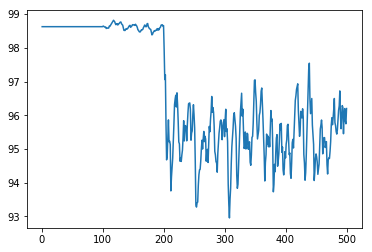

In [5]:
plt.plot(time_id[:500], y_id[:500])
plt.show()

In [6]:
A = np.zeros((PHI.shape[1],PHI.shape[1]))
W = np.zeros(PHI.shape)
g = np.array([])
np.fill_diagonal(A,1)
for k in range(PHI.shape[1]):
    if k == 0:
        W[:,0] = PHI[:,0]
        g = np.append(g, (np.dot(W[:,0],Y))/np.power(np.linalg.norm(W[:,0]),2))
    else:
        temp = np.zeros(PHI.shape[0])
        for i in range(k):
            A[i,k] = (np.dot(W[:,i],PHI[:,k]))/np.power(np.linalg.norm(W[:,i]),2)
            temp += A[i,k] * W[:,i]
        W[:,k] = PHI[:,k] - temp
        g = np.append(g, (np.dot(W[:,k],Y))/np.power(np.linalg.norm(W[:,k]),2))

theta = np.zeros(len(g))
for i in reversed(range(len(g))):
    if i == len(g):
        theta[i] = g[i]
    else:
        temp = 0
        for k in range(i+1, len(g)):
            temp += A[i,k] * theta[k]
        theta[i] = g[i] - temp

In [7]:
y_hat = np.dot(PHI, theta)

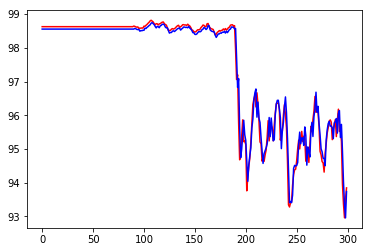

In [8]:
plt.plot(y_id[10:310], color='red')
plt.plot(y_hat[:300], color='blue')
plt.show()

In [11]:
theta

array([ -2.60679575e+02,  -6.95260243e+00,   4.67850421e+01,
         4.22596670e+01,   3.75566410e+01,   3.58436845e+01,
        -6.89144061e+00,   2.88878441e+01,   3.22822700e+01,
         7.19580810e+01,  -2.09557630e+01,  -3.33774340e+00,
        -5.93534684e+00,   3.50566804e+01,  -1.98254120e+01,
         7.08745092e-02,   1.35466686e-01,   8.80012270e-01,
         2.41619315e-01,  -5.56630393e-01,   7.83668868e-01,
        -3.76749439e-01,  -1.10487965e+00,  -1.02366305e+00,
        -3.43907387e-01,   7.17342211e-01,  -2.96374131e-01,
        -3.96156732e-01,   5.27149453e-02,  -3.03630924e-01,
         6.20670241e-02,  -2.57162225e-01,  -1.52798192e+00,
        -1.78367132e-01,  -1.66074090e+00,  -1.91123673e+00,
        -1.00192572e+00,  -4.68436118e-01,   3.79849500e-01,
        -3.71056658e-01,  -5.94383737e-02,  -4.02877006e-01,
         1.43077202e+00,   4.17560824e-01,  -1.03058954e+00,
         5.92270799e-01,  -1.80454374e+00,  -2.20631624e+00,
        -2.29986467e+00,